In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

import ipdb


In [2]:
# true parameters for simulation
betaT = np.array([[2.], [-1.]])
s2T = 1

x1 = np.arange(0, 10, 0.5)
x2 = -x1+0.1*np.random.normal(0, 2, size=len(x1))
X = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1)]) # data matrix

E = np.random.normal(0, 3, size=len(x1)).reshape(-1, 1) # simulated random noise
y = np.dot(X, betaT)+E # simulated data

# prior 
L0 = 0.01*np.eye(2) 
mu0 = np.array([[0.], [0.]])
a0 = 1.
b0 = 1.

In [3]:
def posterior(mu_pr, L_pr, a_pr, b_pr, dy, dX):
    n = dy.shape[0]
    XTX = np.dot(dX.T, dX)
    #XTX_inv = np.linalg.inv(XTX)
    #betaLS = np.dot(np.dot(XTX_inv, X), dY.reshape(-1, 1))
    L_po = L_pr+XTX
    L_po_inv = np.linalg.inv(L_po)
    mu_po = np.dot(L_po_inv, np.dot(L_pr, mu_pr.reshape(-1, 1))+np.dot(dX.T, dy.reshape(-1, 1)))
    a_po = a_pr + 0.5*n
    b_po = b_pr + 0.5*(np.dot(y.T,y) 
            +np.dot(mu_pr.T, np.dot(L_pr, mu_pr))
            -np.dot(mu_po.T, np.dot(L_po, mu_po)))[0,0]
            
    return mu_po, L_po, a_po, b_po


muN, LN, aN, bN = posterior(mu0, L0, a0, b0, y, X)

b1s = np.linspace(1, 3, 400)
b2s = np.linspace(-2, 0, 400)
gb1s, gb2s = np.meshgrid(b1s, b2s)

b1sv = gb1s.reshape(-1, 1)
b2sv = gb2s.reshape(-1, 1)
b12sv = np.hstack((b1sv, b2sv))
pmp = bN/(aN-1) # posterior mean of precision 
cov_est = np.linalg.inv(pmp*LN)

zsv = multivariate_normal.pdf(b12sv, mean=muN.reshape(-1), cov=cov_est)
gzs = zsv.reshape(gb1s.shape)


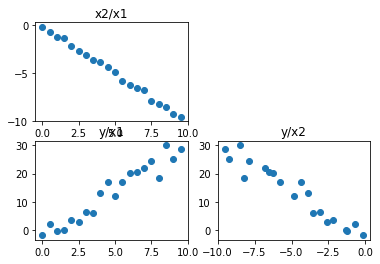

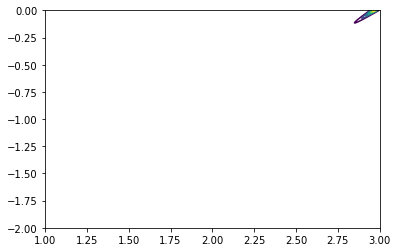

In [4]:
plt.figure()
plt.subplot(221)
plt.plot(x1, x2, 'o')
plt.title("x2/x1")
plt.subplot(223)
plt.plot(x1, y, 'o')
plt.title("y/x1")
plt.subplot(224)
plt.plot(x2, y, 'o')
plt.title("y/x2")

plt.figure()
plt.contour(gb1s, gb2s, gzs)

plt.ion()
plt.show()
